In [1]:
import pandas as pd
import numpy as np
from time_series_forecast_utils import *


> **Intro:** In this notebook, we analyze sales data for 7 different clothing products in terms of trends and seasonality. We Investigate correlations between different product types. Also, forecast the sales of the Dress product for the next five weeks..<br><br> 
**Data:** The data is sales for Blouses, Dress, Hoodie, Jackets, Shorts, Skirt, and T-shirts products weekly from 2018-09-27 to 2020-09-10 taken on Thursdays.

   

> # EDA

## Reading the Dataset

In [2]:
# loading the dataset
data = pd.read_csv("./sales.csv")

In [3]:
data.head()

,date,Blouse,Dress,Hoodie,Jacket,Shorts,Skirt,T-shirt
0,2018-09-27,19194,21046,12573,10720,3309,9791,26523
1,2018-10-04,13292,14721,6916,7645,2557,6981,17594
2,2018-10-11,19954,20708,7495,9138,3632,9956,23666
3,2018-10-18,17547,20016,7913,9693,3565,7894,20586
4,2018-10-25,17420,20397,8887,12132,3415,7495,19395


In [4]:
data.shape

(103, 8)

<div class="alert alert-block alert-success"><strong>
    We have 103 samples, and 7 products. Between the products we have 5 products that are usually used in summer (Dress, Shorts, Skirt, T-shirt, Blouse) and two in winter (Hoodie, Jacket), so most of the products are summer used products.
 </div>
   

## Pre-proccessing

- ### Quality Check

In [5]:
# check for duplicated dates
data.duplicated(subset=['date']).any()

False

In [6]:
# check for missing data
data.isna().sum()

date       0
Blouse     0
Dress      0
Hoodie     0
Jacket     0
Shorts     0
Skirt      0
T-shirt    0
dtype: int64

In [7]:
# check for negative or zero values
(data[data.columns[1:]] <= 0).any().any()

False

<div class="alert alert-block alert-success"><strong>
    There are do duplicates or missing values, sale values are > 0
 </div>
   

- ### Transmormations

In [8]:
# convert the date column into a date time type
data['date'] = pd.to_datetime(data['date'])

In [9]:
# check min and max dates
data['date'].min().date(), data['date'].max().date()

(datetime.date(2018, 9, 27), datetime.date(2020, 9, 10))

In [10]:
# get days counts
data['date'].dt.day_name().value_counts()

date
Thursday    103
Name: count, dtype: int64

In [11]:
# take first difference then get value counts
data['date'].diff().value_counts()

date
7 days    102
Name: count, dtype: int64

In [12]:
# set date as index, and sort it 
data.set_index('date', inplace=True)
data.sort_index(inplace=True)

In [13]:
# get frequency to make sure data is weekly on Thursday
data.index.inferred_freq

'W-THU'

<div class="alert alert-block alert-success"><strong>    The data is weekly from 2018-09-27 to 2020-09-10 taken on Thursdays
 </div>
   

In [14]:
# create a new column as total sales
data['Total Sales'] = data.sum(axis=1)

In [15]:
data.head()

,Blouse,Dress,Hoodie,Jacket,Shorts,Skirt,T-shirt,Total Sales
date,,,,,,,,
2018-09-27,19194,21046,12573,10720,3309,9791,26523,103156
2018-10-04,13292,14721,6916,7645,2557,6981,17594,69706
2018-10-11,19954,20708,7495,9138,3632,9956,23666,94549
2018-10-18,17547,20016,7913,9693,3565,7894,20586,87214
2018-10-25,17420,20397,8887,12132,3415,7495,19395,89141


## Trend and Seasonality

- ### Total Sales

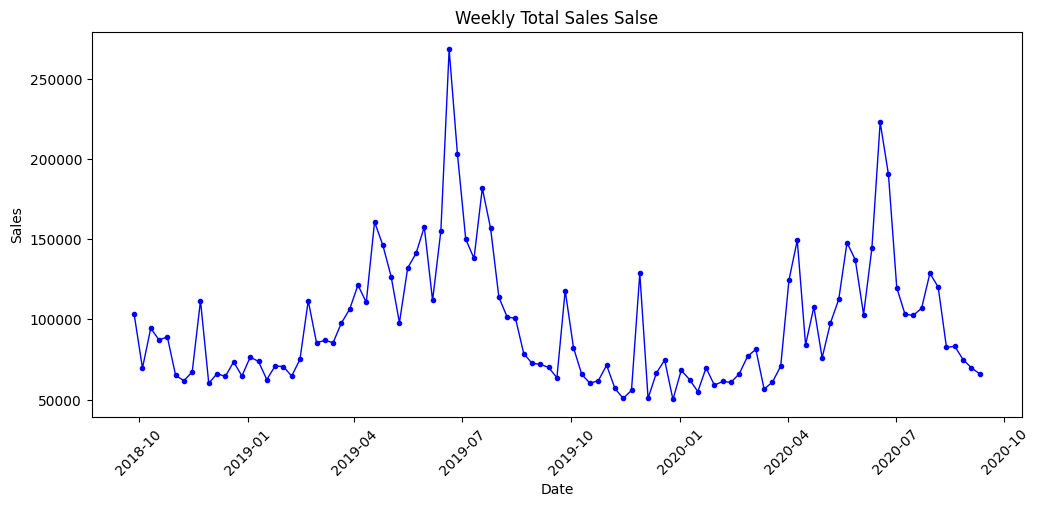

In [16]:
# plot the time series for total sales
plot_time_series(data['Total Sales'], title_name='Total Sales')

<div class="alert alert-block alert-success"><strong>
    - The above plot for the total sales seems to have a seasonality happens every year (an M shape accure every year on around July), which means in summer. So maybe we can say there is seasonality of 1 year which is 52 weeks. And that maybe make sense because most of our products are summer used.<br>
    - In terms of trend there is no clear trend can be seen visually.
 </div>
   

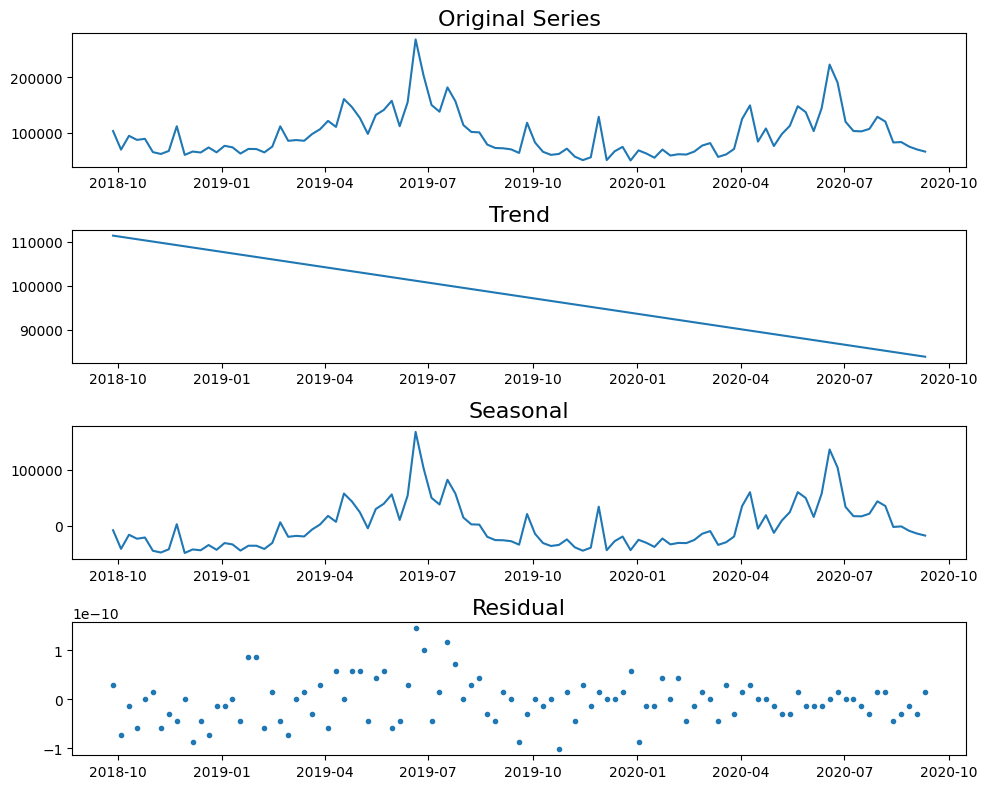

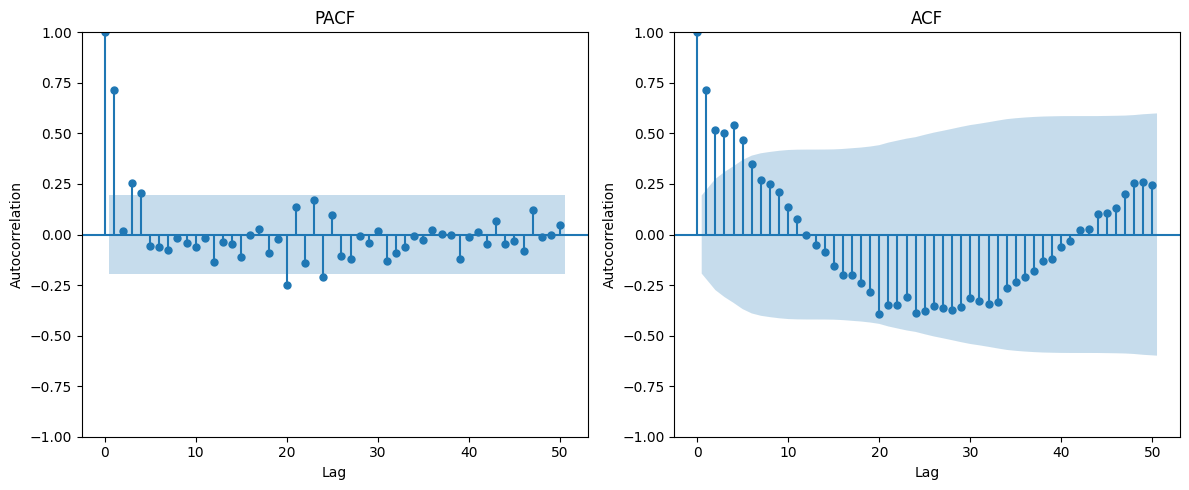

The  time series is stationary in terms of trend based on KPSS test, p-value = 0.1 


In [17]:
# call a function that shows time series statistical calculations (stl decomposition, pacf, acf, adf)
analyze_time_series(data['Total Sales'])

<div class="alert alert-block alert-success"><strong>
    - The ACF and PACF show high statistically significant autocorrelations on certain lags (eg. in PACF lag 1,3,4 in ACF up to 5 lags). Which could mean the value is correlated with its previous value or previous third-fourth. Also the current value could be correlated with the error(caused by random event like promotions in sales) from the previous 5 values<br><br>
    - From the decomposed components specifically the trend, it seems there is a weak down trend in the sales. The KPSS test says there is no trend.
    <br><br>
    - We have confirmed visually that there is a seasonality of 52 period, we could confirm it by using the PACF if it shows a high autocorrelation at lag 52, but the sample size is small to calculate up to 52 lags, so we can't do it.
</div>
   

- ### Blouse

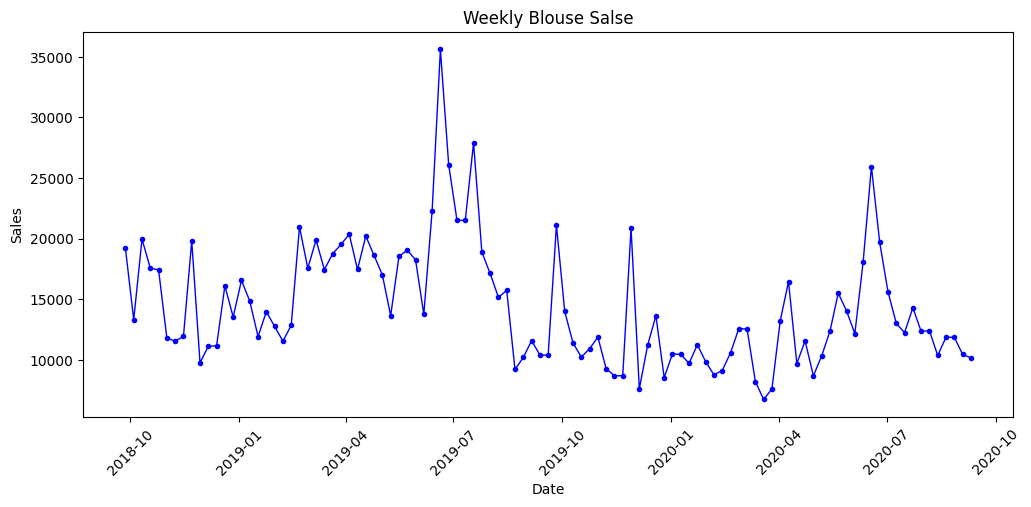

In [18]:
# plot the time series for Blouse sales
plot_time_series(data.Blouse, title_name='Blouse')

<div class="alert alert-block alert-success"><strong>
    - From the above plot it seems there is a seasonality happens every year in July (summer time).
    <br>
    - In terms of trend there could be a weak down trend, but will confirm next.
 </div>
   

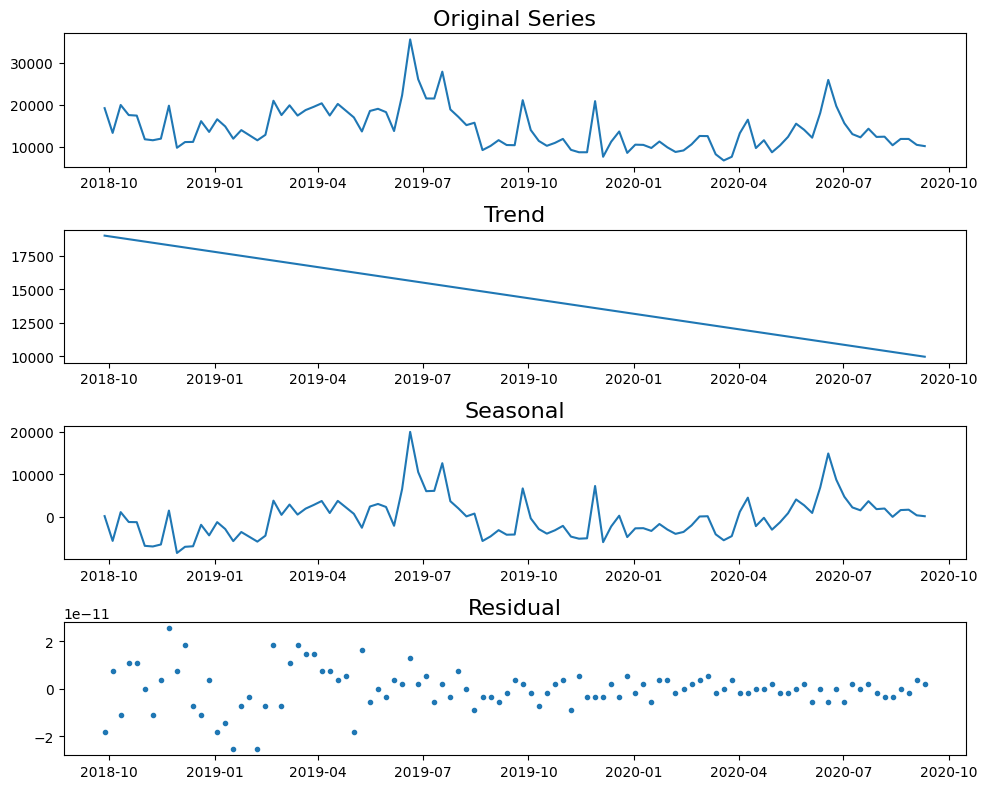

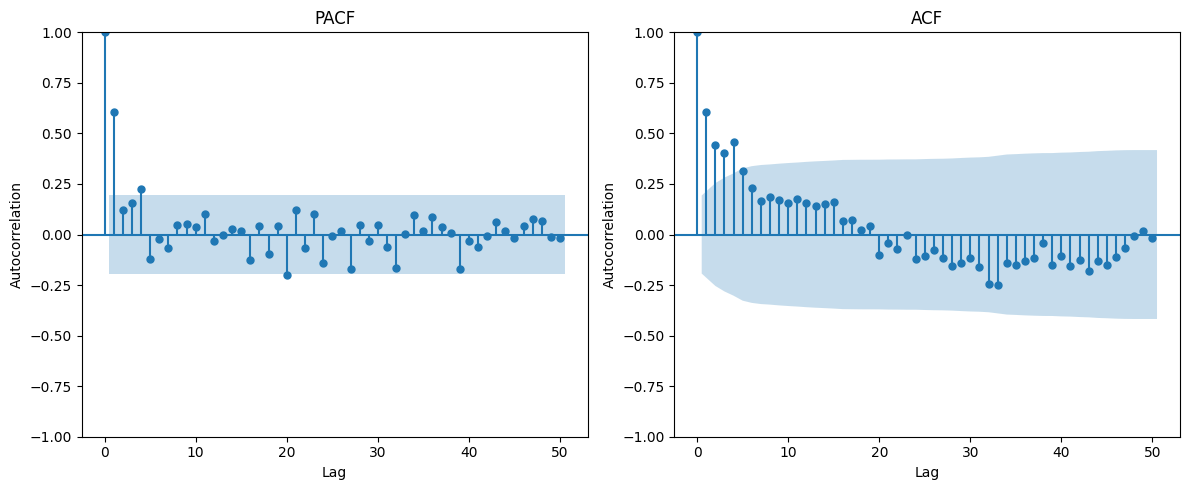

The  time series is not stationary in terms of trend based on KPSS test, p-value = 0.04508852508968372 


In [19]:
# call a function that shows time series statistical calculations (stl decomposition, pacf, acf, adf)
analyze_time_series(data['Blouse'])

<div class="alert alert-block alert-success"><strong>
    - The ACF and PACF show high statistically significant autocorrelations on certain lags (eg. in PACF lag 1, in ACF up to 4 lags). Which could mean the value is correlated with its previous value. Also the current value could be correlated with the error from the previous 4 values<br><br>
    - From the decomposed components specifically the trend, it seems there is a down trend in the sales. The KPSS test says it's not stationary because it has a trend.
    <br><br>
    - We have seen visually that there is a seasonality of 52 period (yearly).
</div>
   

- ### Dress

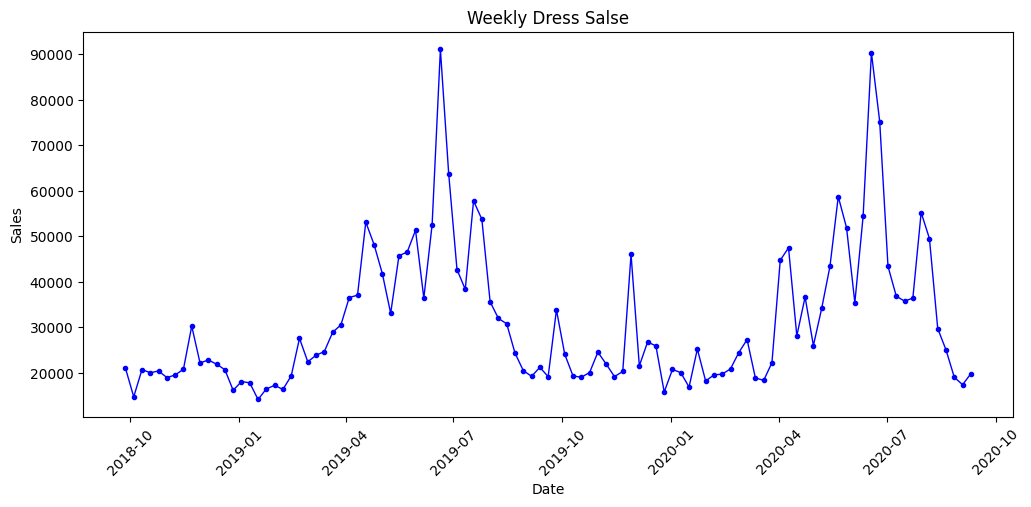

In [20]:
# plot the time series for Dress sales
plot_time_series(data.Dress, title_name='Dress')

<div class="alert alert-block alert-success"><strong>
    - The above plot for the Dress sales seems to have a seasonality happens every year (an M shape accure every year on around July), which means in summer (make sense as Dresses usually used in summer). So maybe we can say there is seasonality of 1 year which is 52 weeks.<br>
    - In terms of trend there is no clear trend can be seen visually, will confirm next.
 </div>
   

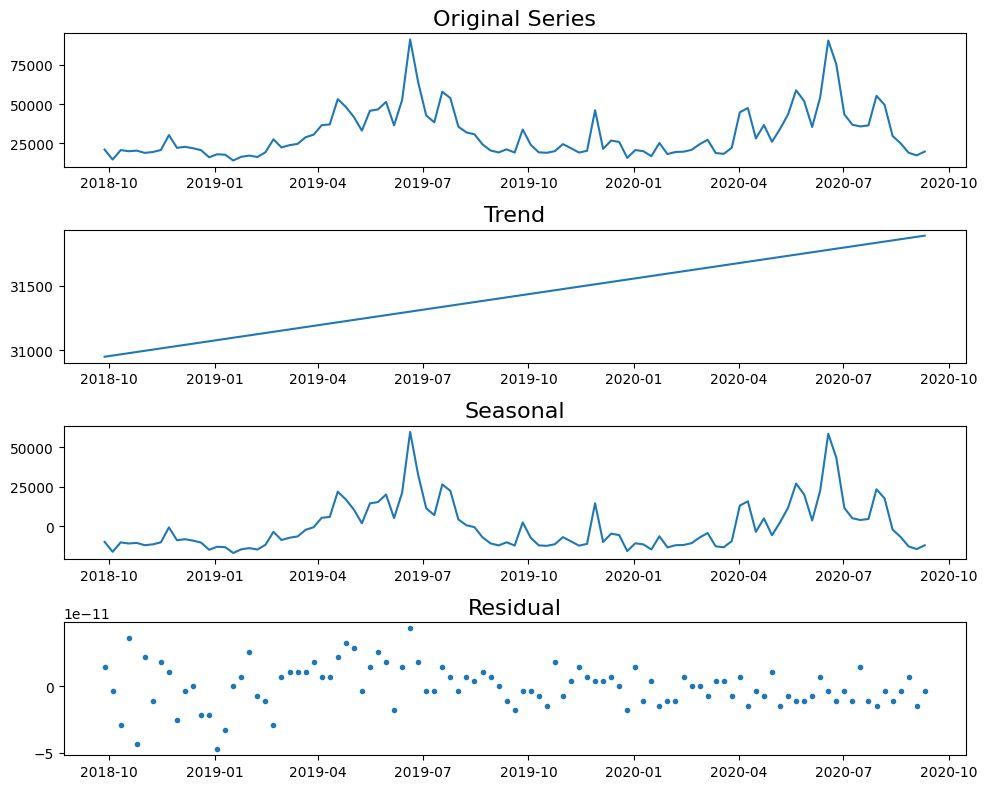

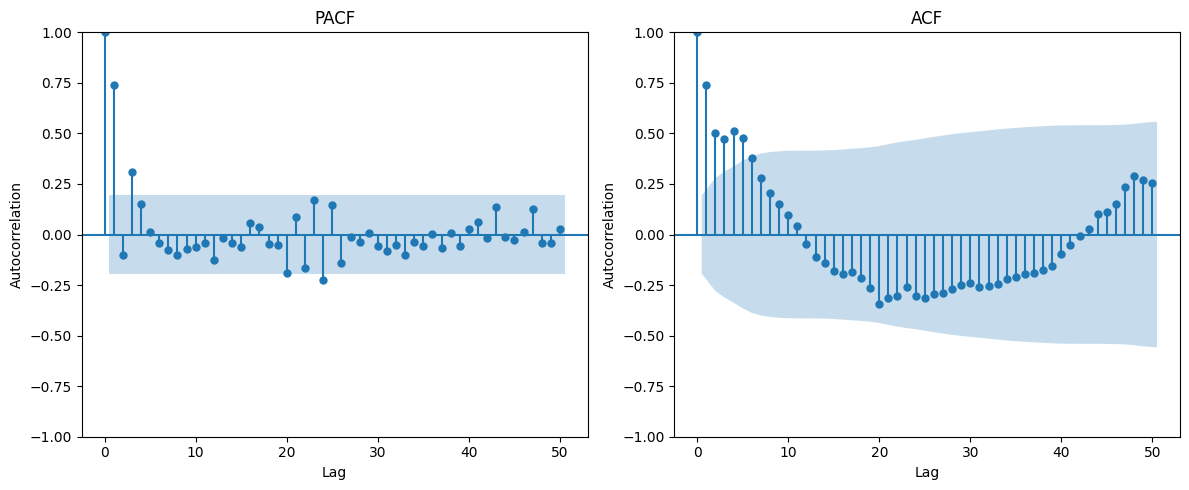

The  time series is stationary in terms of trend based on KPSS test, p-value = 0.1 


In [21]:
# call a function that shows time series statistical calculations (stl decomposition, pacf, acf, adf)
analyze_time_series(data['Dress'])

<div class="alert alert-block alert-success"><strong>
    - The ACF and PACF show high statistically significant autocorrelations on certain lags (eg. in PACF lag 1,3 in ACF up to 5 lags). Which could mean the value is correlated with its previous value or previous third one. Also the current value could be correlated with the error from the previous 5 values<br><br>
    - From the decomposed components specifically the trend, it seems there is a weak down trend in the sales. The KPSS test says there is no trend.
    <br><br>
    - We have confirmed visually that there is a seasonality of 52 period.
</div>
   

- ### Hoodie

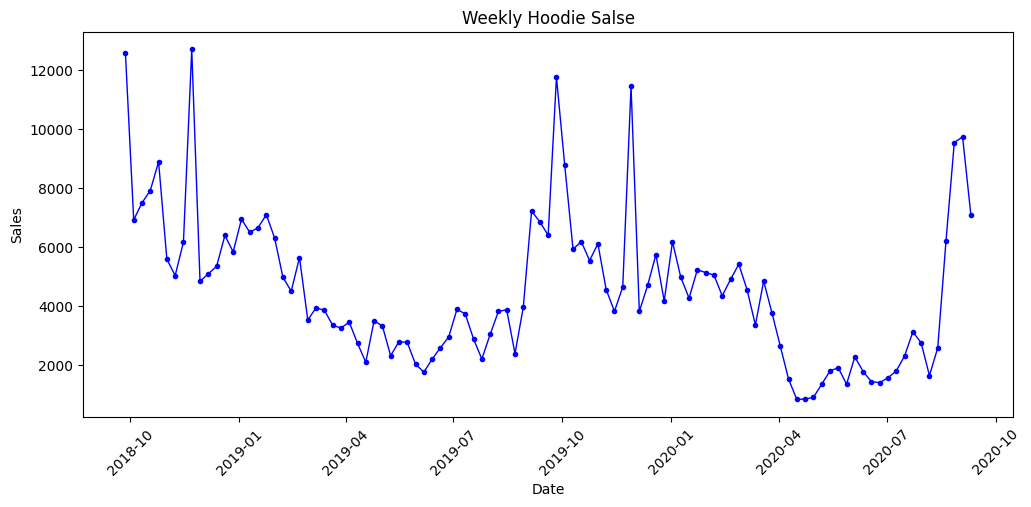

In [22]:
# plot the time series for Hoodie sales
plot_time_series(data.Hoodie, title_name='Hoodie')

<div class="alert alert-block alert-success"><strong>
    - The above plot for the Hoodie sales seems to have a seasonality happens every year in October and December (winter times, hoodies usually used in winter). Since in October/December 2018 it seems there were peaks, also in 2019 again, and at the end in October 2020 we see the peak accur again.<br>
    - In terms of trend there could be a down trend, will confirm next.
 </div>
   

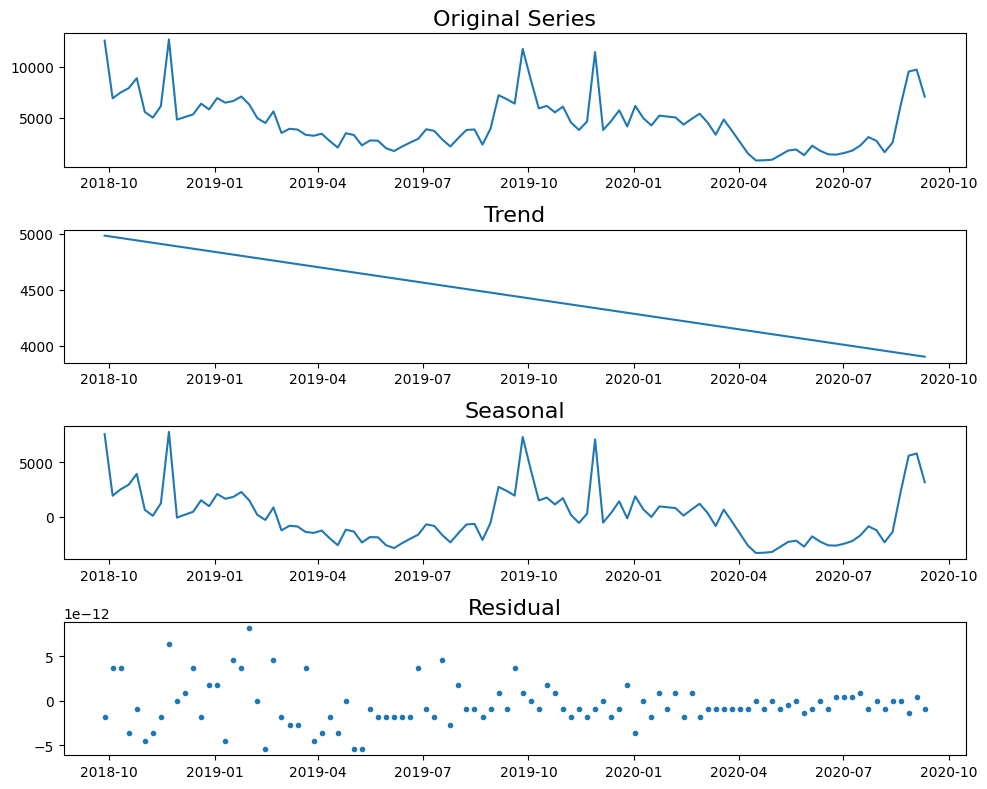

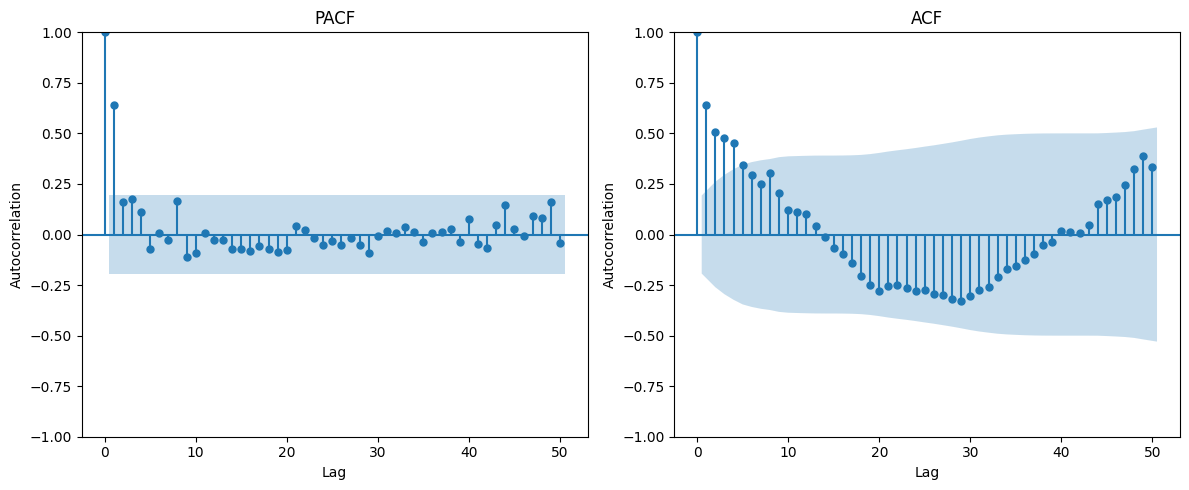

The  time series is stationary in terms of trend based on KPSS test, p-value = 0.07825728946262689 


In [23]:
# call a function that shows time series statistical calculations (stl decomposition, pacf, acf, adf)
analyze_time_series(data['Hoodie'])

<div class="alert alert-block alert-success"><strong>
    - The ACF and PACF show high statistically significant autocorrelations on certain lags (eg. in PACF lag 1, in ACF up to 4 lags). Which could mean the value is correlated with its previous value. Also, the current value could be correlated with the error from the previous 4 values<br><br>
    - From the decomposed components specifically the trend, it seems there is a weak downtrend in the sales. The KPSS test says there is no trend, if you look at the p-value it's very close to the confidence level (0.05), so it's not that confident about not having a trend, then we may say there is a downtrend.
    <br><br>
    - We have confirmed visually that there is a seasonality of 52 week period.
</div>
   

- ### Jacket

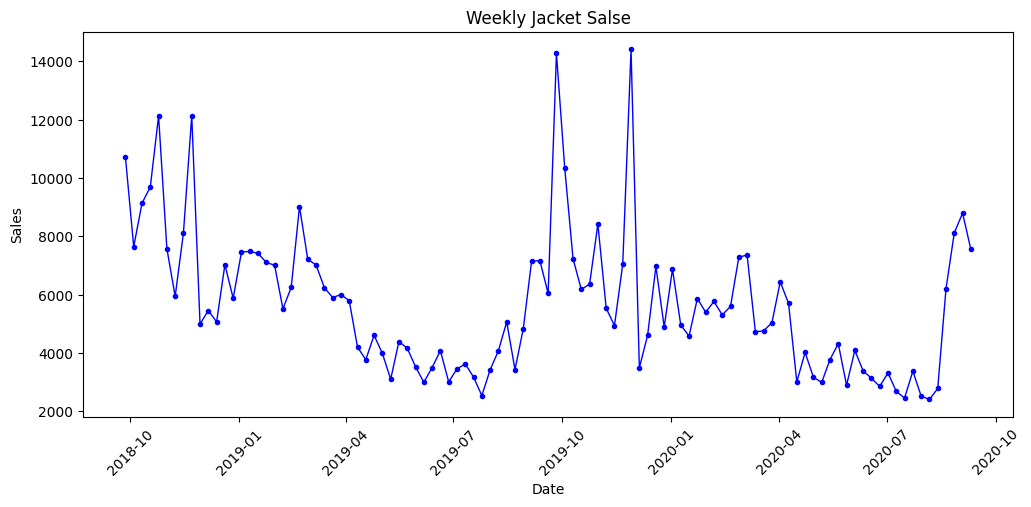

In [24]:
# plot the time series for Jacket sales
plot_time_series(data.Jacket, title_name='Jacket')

<div class="alert alert-block alert-success"><strong>
    - From the above plot for the Hoodie sales, it's not clear if there is a strong seasonality, but maybe
    we have a seasonality that happens every year in October and December (winter times, Jackets are usually used in winter).in 2018 seems to happen with less magnitude.<br>
    - In terms of trend there could be a down trend.
 </div>
   

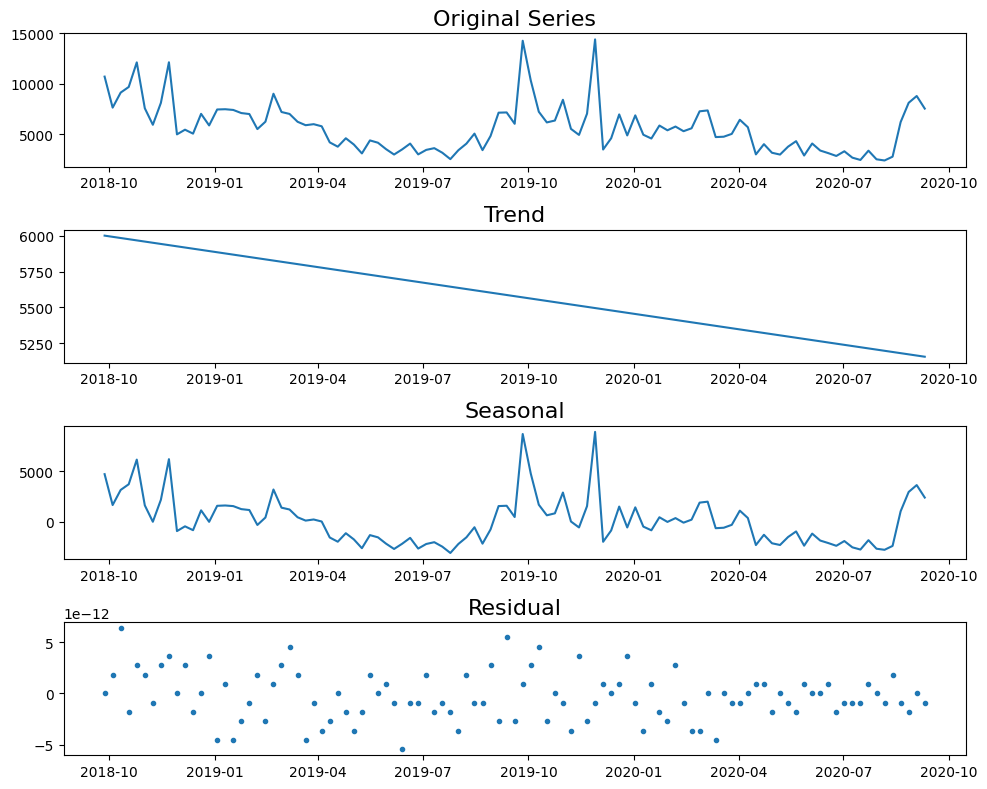

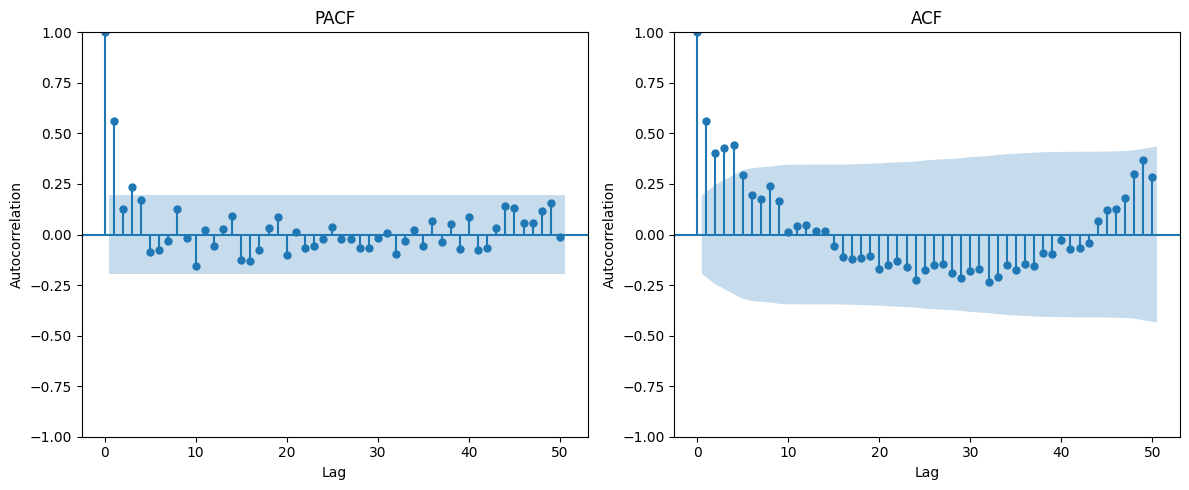

The  time series is stationary in terms of trend based on KPSS test, p-value = 0.055746576733034084 


In [25]:
# call a function that shows time series statistical calculations (stl decomposition, pacf, acf, adf)
analyze_time_series(data['Jacket'])

<div class="alert alert-block alert-success"><strong>
    - The ACF and PACF show high statistically significant autocorrelations on certain lags (eg. in PACF lag 1, in ACF up to 4 lags). Which could mean the value is correlated with its previous value. Also, the current value could be correlated with the error from the previous 4 values<br><br>
    - From the decomposed components specifically the trend, it seems there is a weak downtrend in the sales. The KPSS test says there is no trend, if you look at the p-value it's very close to the confidence level (0.05), so it's not that confident about not having a trend, then we may say there is a downtrend.
    <br><br>
    - We saied from visual look that there is a seasonality of 52 week period.
</div>
   

- ### Shorts

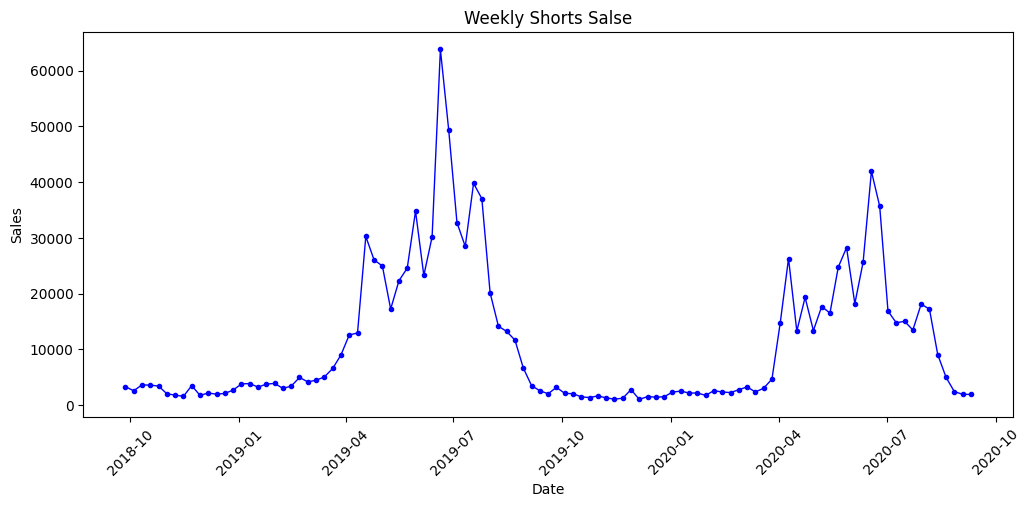

In [26]:
# plot the time series for Shorts sales
plot_time_series(data.Shorts, title_name='Shorts')

<div class="alert alert-block alert-success"><strong>
    - The above plot for the Shorts sales seems to have a strong seasonality happens every year (around June/July, which means in summer, make sense as Shorts usually used in summer), in winter seasons sales drop down a lot. So maybe we can say there is seasonality of 1 year which is 52 weeks.<br>
    - In terms of trend there is no clear trend can be seen visually, will confirm next.
 </div>
   

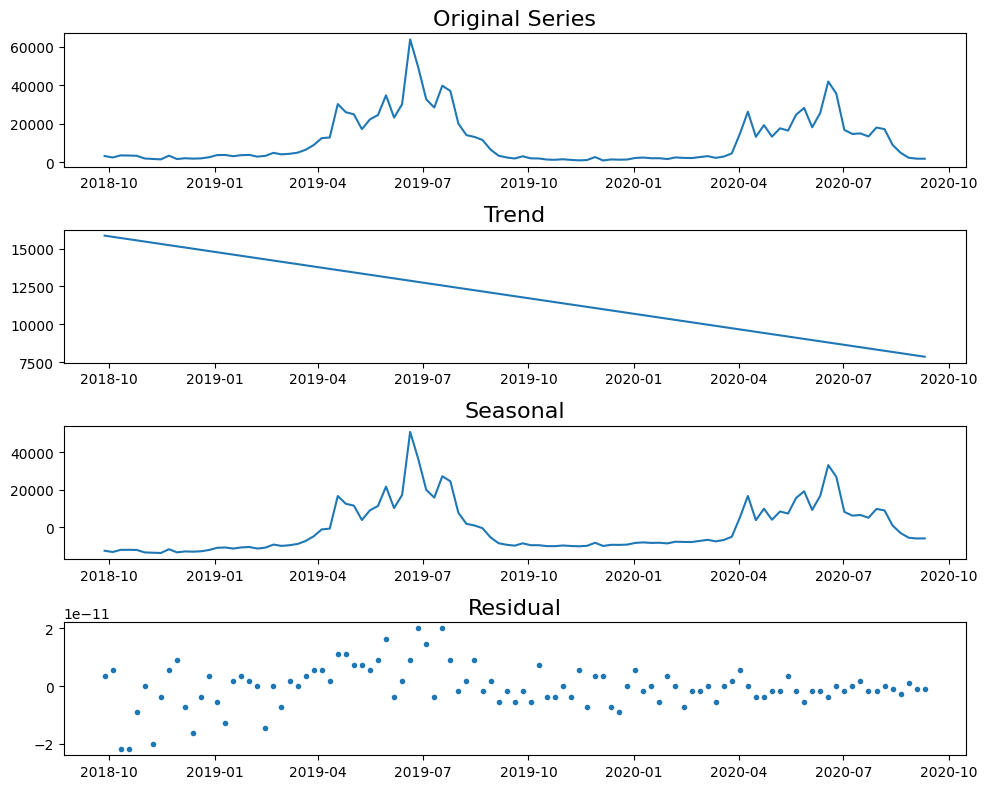

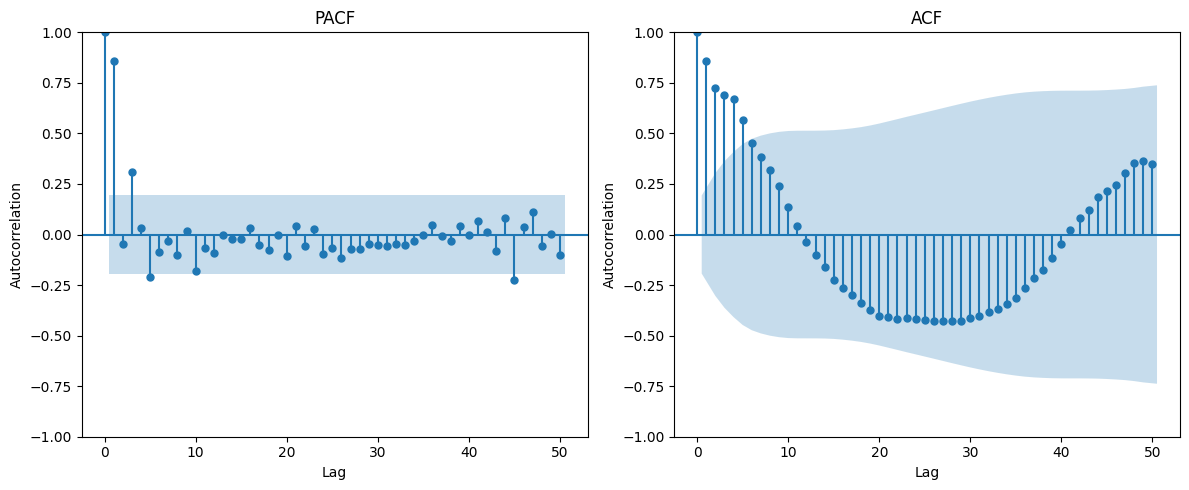

The  time series is stationary in terms of trend based on KPSS test, p-value = 0.1 


In [27]:
# call a function that shows time series statistical calculations (stl decomposition, pacf, acf, adf)
analyze_time_series(data['Shorts'])

<div class="alert alert-block alert-success"><strong>
    - The ACF and PACF show high statistically significant autocorrelations on certain lags (eg. in PACF lag 1, in ACF up to 5 lags). Which could mean the value is correlated with its previous value. Also, the current value could be correlated with the error from the previous 5 values<br><br>
    - From the decomposed components specifically the trend, it seems there is a weak downtrend in the sales. The KPSS test says it's stationary so there is no trend.
    <br><br>
    - We have confirmed visually that there is a seasonality of 52 week period.
</div>
   

- ### T-shirt

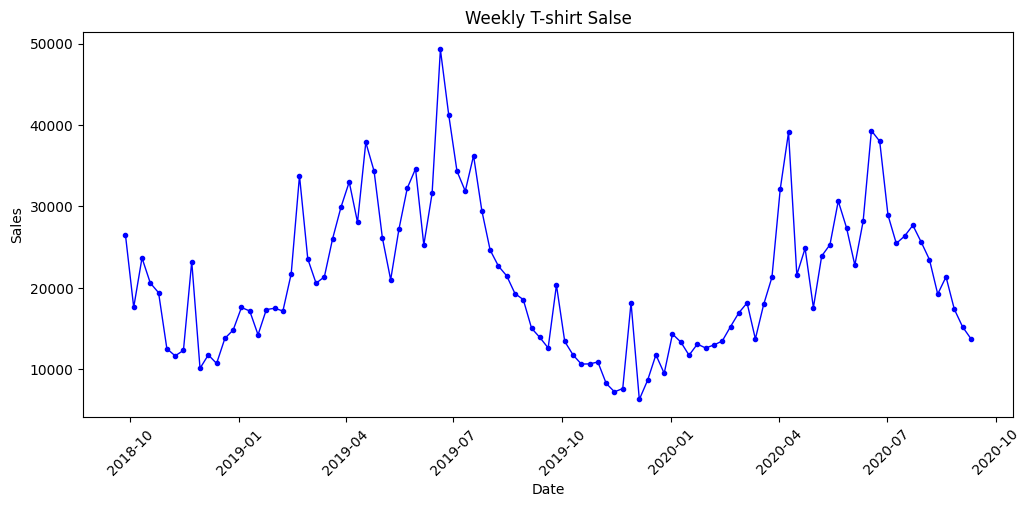

In [28]:
# plot the time series for T-shirt sales
plot_time_series(data['T-shirt'], title_name='T-shirt')

<div class="alert alert-block alert-success"><strong>
    - The above plot for the Shorts sales seems to have a seasonality happens every year (around June/July, which means in summer) seems to have a shape of W.<br>
    - In terms of trend there is no clear trend can be seen visually, will confirm next.
 </div>
   

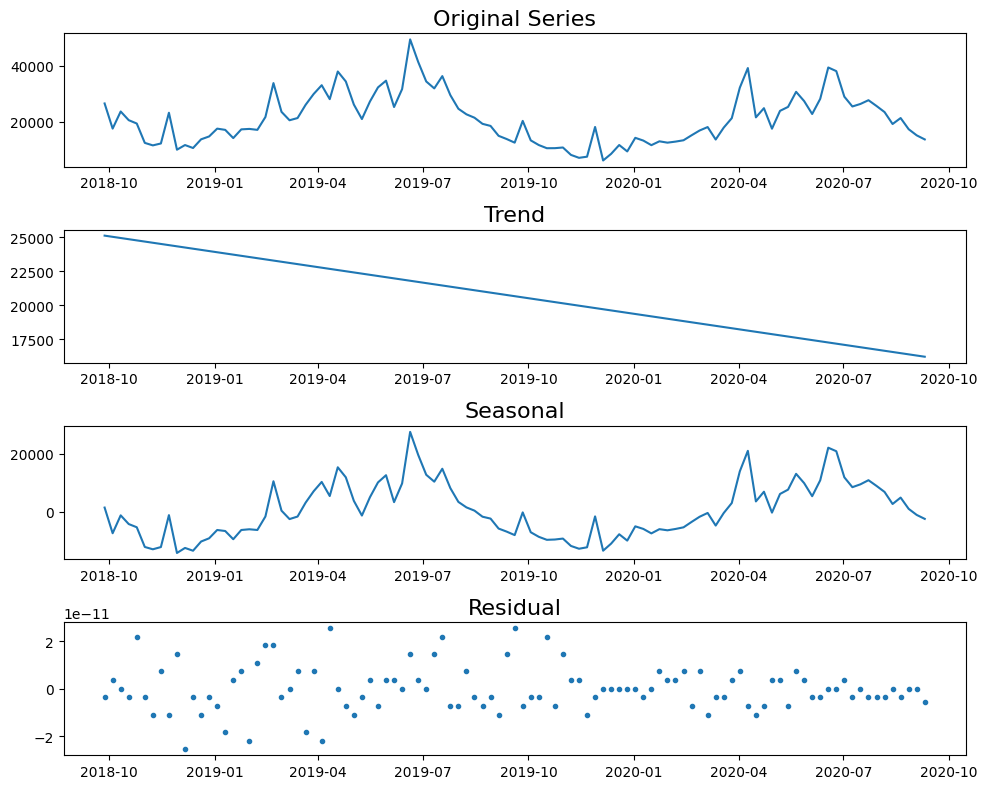

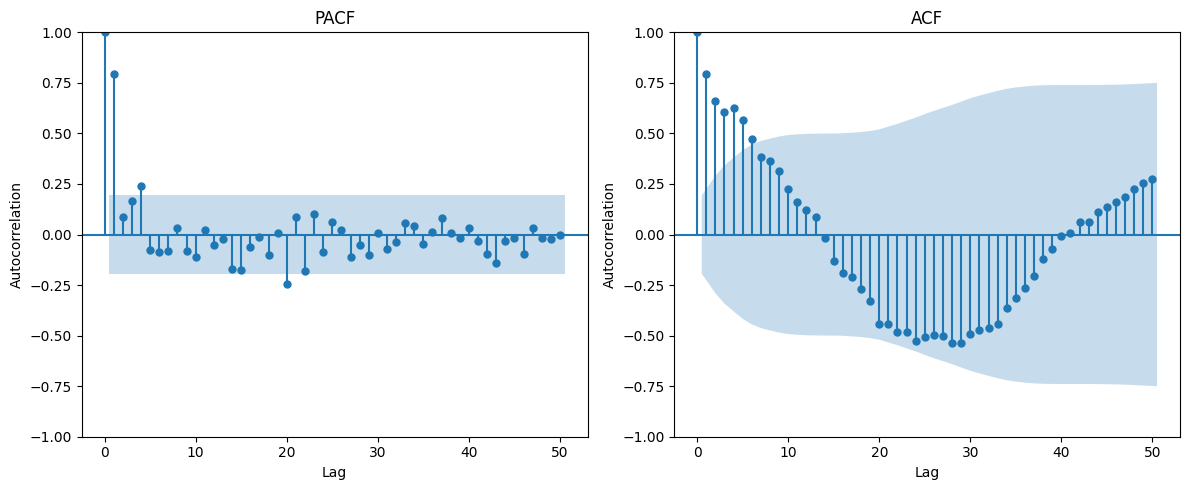

The  time series is stationary in terms of trend based on KPSS test, p-value = 0.1 


In [29]:
# call a function that shows time series statistical calculations (stl decomposition, pacf, acf, adf)
analyze_time_series(data['T-shirt'])

<div class="alert alert-block alert-success"><strong>
    - The ACF and PACF show high statistically significant autocorrelations on certain lags (eg. in PACF lag 1, in ACF up to 6 lags). Which could mean the value is correlated with its previous value. Also, the current value could be correlated with the error from the previous 6 values<br><br>
    - From the decomposed components specifically the trend, it seems there is a weak downtrend in the sales. The KPSS test says it's stationary so there is no trend.
    <br><br>
    - We have confirmed visually that there is a seasonality of 52 week period.
</div>
   

- ### Skirt

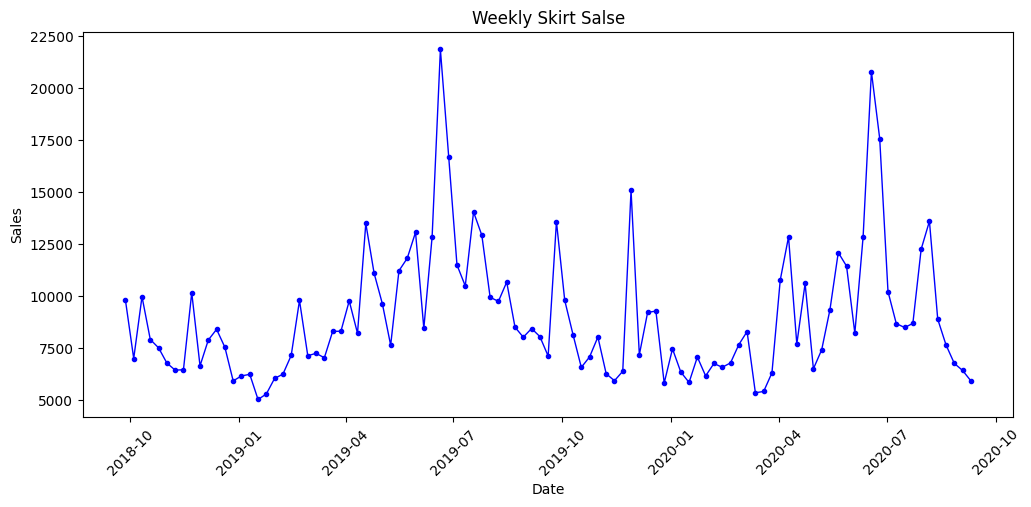

In [30]:
# plot the time series for Skirt sales
plot_time_series(data.Skirt, title_name='Skirt')

<div class="alert alert-block alert-success"><strong>
    - The above plot for the Shorts sales seems to have a seasonality happens every couple of months. 
    Also a long peak every year around June could be another season period.<br>
    - In terms of trend there is no clear trend can be seen visually, will confirm next.
 </div>
   

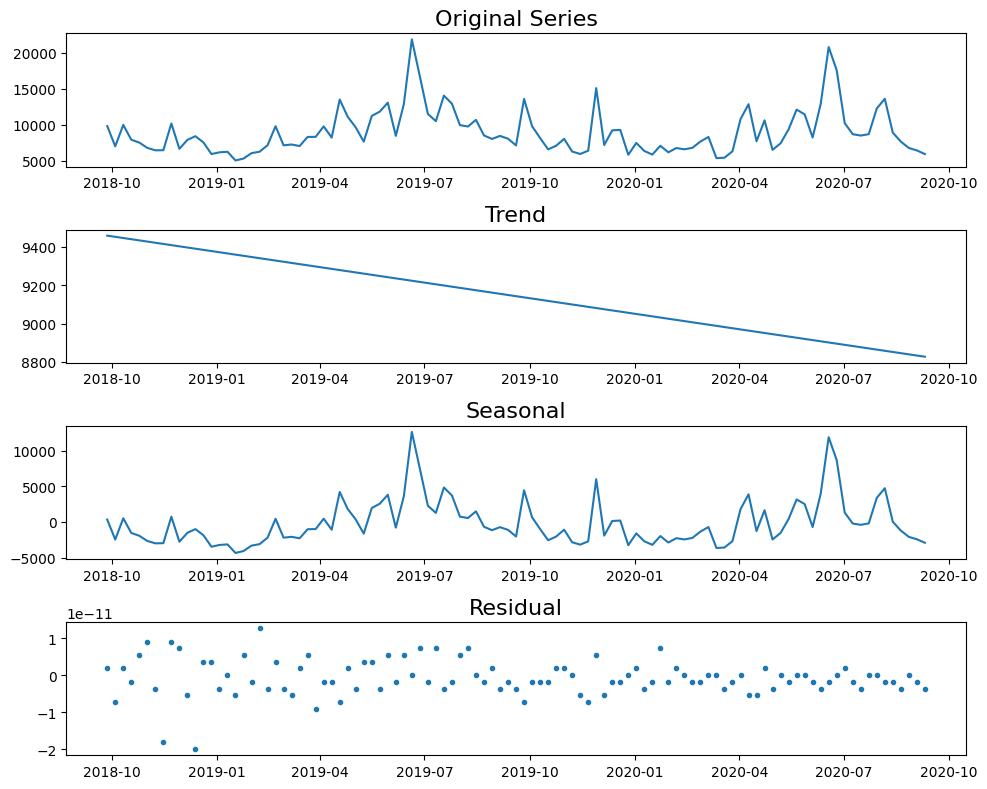

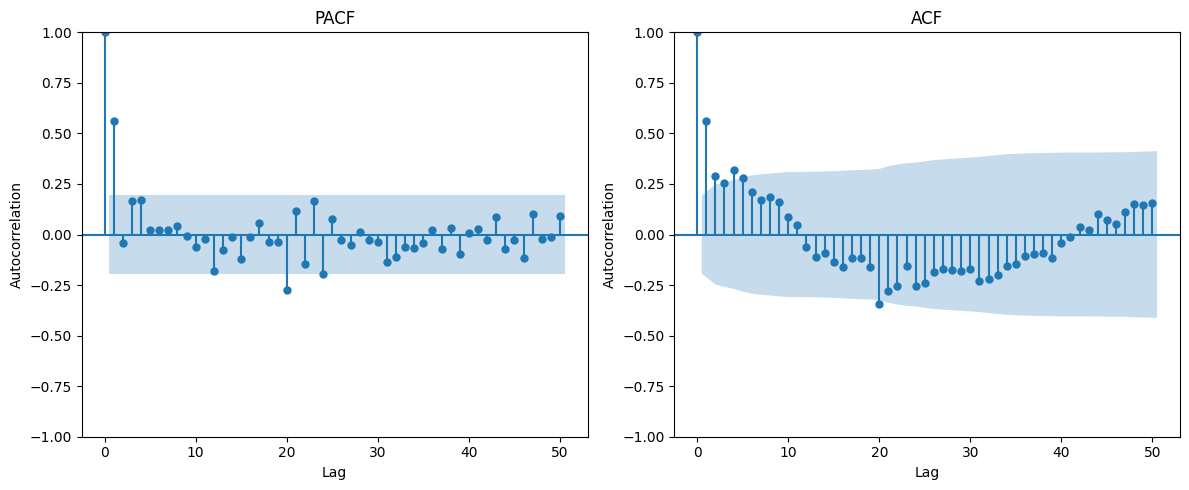

The  time series is stationary in terms of trend based on KPSS test, p-value = 0.1 


In [31]:
# call a function that shows time series statistical calculations (stl decomposition, pacf, acf, adf)
analyze_time_series(data['Skirt'])

<div class="alert alert-block alert-success"><strong>
    - The ACF and PACF show high statistically significant autocorrelations on certain lags. PACF on lag 1 means the value is correlated with it's previous one, also on 20 could mean there is a seasonality happens every 20 weeks. The ACF could confirm our assumption about the 20 weeks season because it also has a peak on lag 20.<br><br>
    - From the decomposed components specifically the trend, it seems there is a weak downtrend in the sales. The KPSS test says it's stationary so there is no trend.
    <br><br>
    - We may say there are two seasons every 20 weeks and the yearly.
</div>
   

# correlation

> <div class="alert alert-block alert-info">
    In this section we would like to see which pair of products are correlated with each other. We will calculate the correlation on different lags between the decomposed time series (only residuals), because non-stationary time series can show a correlation even when there is no true relationship simply because both series may share a common trend or seasonality. Also, if two time series are correlated that does not mean causesation.
</div>
   

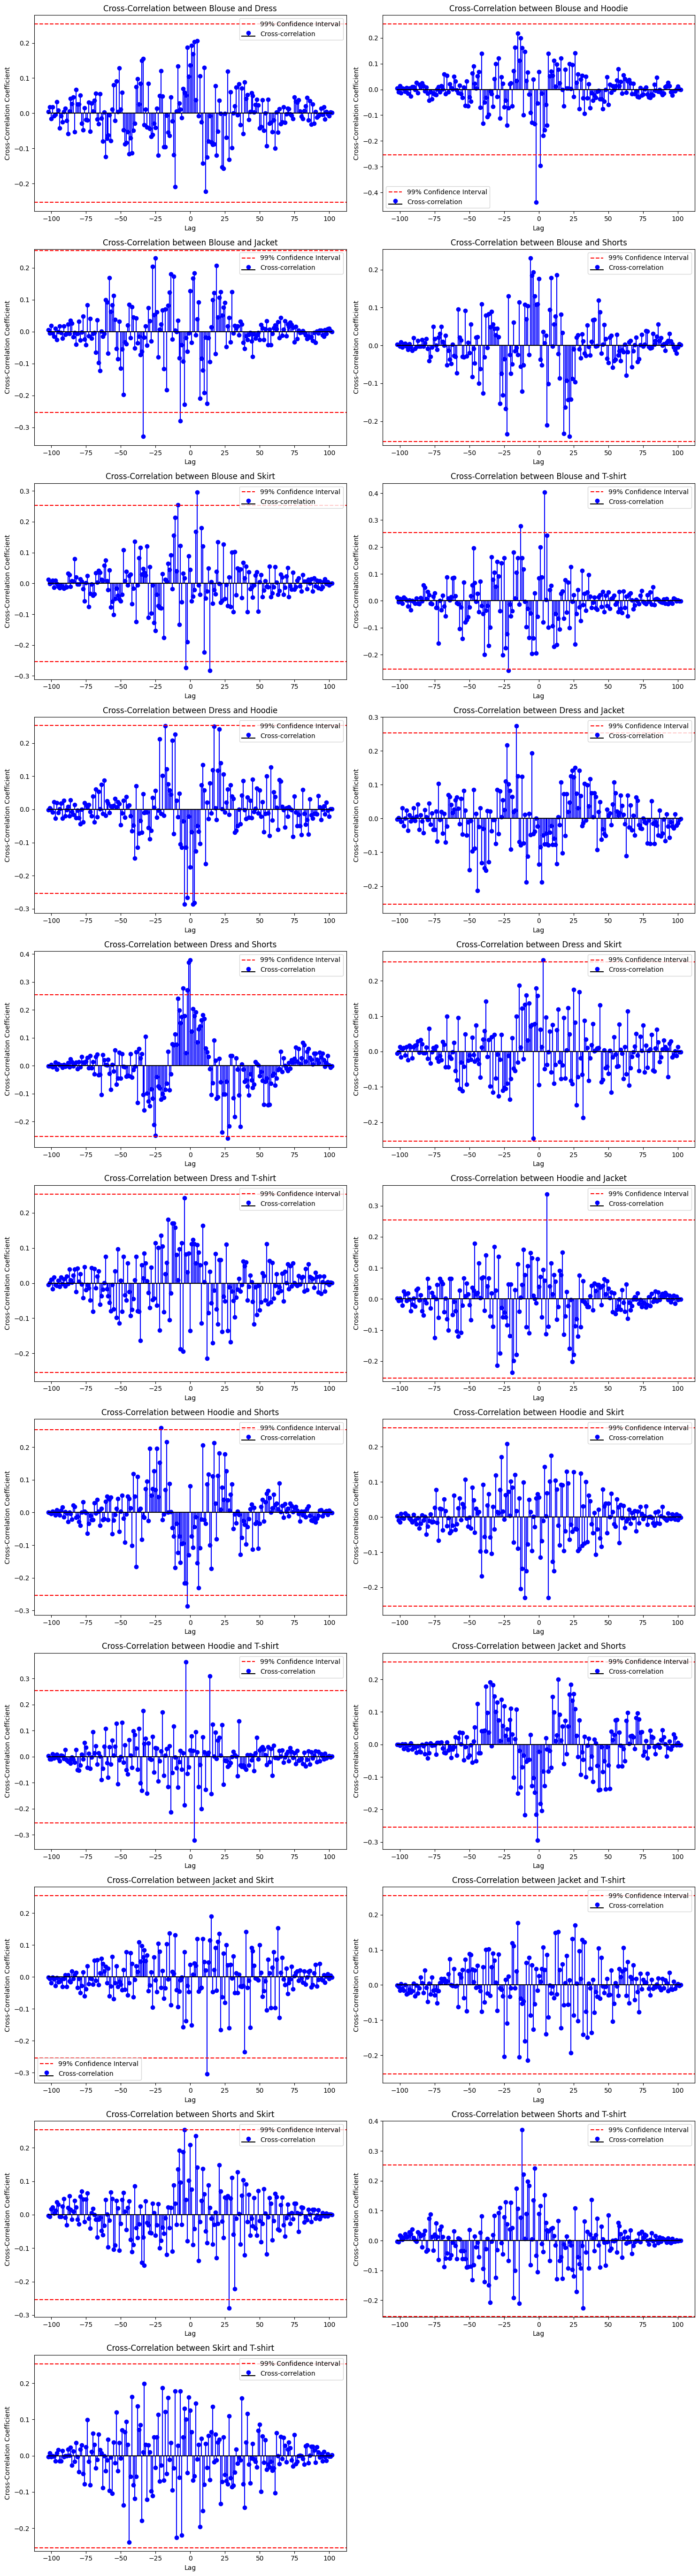

In [32]:
# calculate cross correlations
most_correlated_pairs = cross_correlation_analysis(data[data.columns[:-1]])

> <div class="alert alert-block alert-info">
    - If the correlation coefficient exists outside the red interval, that means the correlation is statistically significant at 99% confidence level. This means it's unlikely that the correlation is zero.<br><br>
    - At positive lag we mean shifting the second series/product sales forward in time to match the relationship between the two time series.<br><br>
    - At negative lag we mean shifting the second series/product sales backward in time to match the relationship between the two time series.</div>

In [33]:
most_correlated_pairs

[('Blouse', 'Hoodie', -2, -0.43892698923052315),
 ('Blouse', 'Jacket', -34, -0.3281145916886537),
 ('Blouse', 'T-shirt', 4, 0.404280920898331),
 ('Dress', 'Shorts', 0, 0.3787743521480929),
 ('Hoodie', 'Jacket', 6, 0.33774918879196236),
 ('Hoodie', 'T-shirt', -3, 0.36371531799120166),
 ('Jacket', 'Skirt', 12, -0.30484046282529087),
 ('Shorts', 'T-shirt', -12, 0.37073428283674403)]

<div class="alert alert-block alert-success">
    The sales of Hoodies tend to decrease 2 weeks before an increase in Blouse sales, with a relationship strength of 0.4389.

The sales of Jackets tend to decrease 34 weeks before an increase in Blouse sales, with a relationship strength of 0.3281.

The sales of T-shirts tend to increase 4 weeks after an increase in Blouse sales, with a relationship strength of 0.4043.

The sales of Shorts tend to increase concurrently with an increase in Dress sales, with a relationship strength of 0.3788.

The sales of Jackets tend to increase 6 weeks after an increase in Hoodie sales, with a relationship strength of 0.3377.

The sales of T-shirts tend to increase 3 weeks before an increase in Hoodie sales, with a relationship strength of 0.3637.

The sales of Skirts tend to decrease 12 weeks after an increase in Jacket sales, with a relationship strength of 0.3048.

The sales of T-shirts tend to increase 12 weeks before an increase in Shorts sales, with a relationship strength of 0.3707.

> # Forecasting for Dress Sales


> <div class="alert alert-block alert-info">
    - From our EDA before we already knew that Dress sales has is no trend and a seasonality of 52 period. Since there is a seasonality we will use a model that can handle that, specificly SARIMA model.<br><br>
    -    The data should be stationary as ARIMA based models depends on the assumption that the data has a statistical properties, and it's easier for it to model the data. We have to specify to the ARIMA model the degree of differencing at which the data becomes stationary (for both trend and seasonality).
    <br><br>
        - Even after differencing to remove trend and seasonality, the data can still has some autocorrelations, we address that using Autoregressive and Moving Average parts of the model. That's applied on ARIMA part and seasonal ARIMA of the SARIMA model</div>

##  SARIMA model 

- ### non-seasonal ARIMA part (trend wise)

> ### differencing parameter


<div class="alert alert-block alert-success"><strong> Since we are not considering a trend in the time series the differencing parameter will be zero.</strong></div>

> ### Autoregressive and Moving Average model parameters

> <div class="alert alert-block alert-info">
   The parameters of AR and MA models depends on the lag numbers at which the current value is affected/correlated with the previous values(errors in the case of MA)

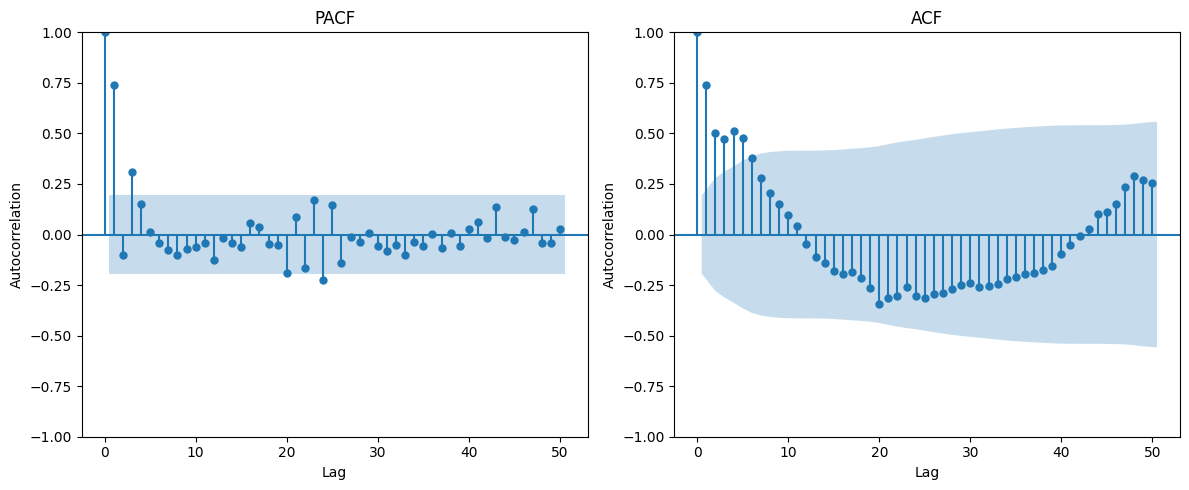

In [34]:
# get the pacf and acf plots
autocorrelation_functions(data.Dress)

<div class="alert alert-block alert-success"><strong> 
    - PACF plot shows significant autocorrelations on lags [1,3] that could indicate that the value is correlated with it's previous value or third previous value, so number of lags for AR model could be 1 or 3 or [1,3].<br><br>
    - ACF shows a significant autocorrelation up to 5 lags, that could indicate that only up to five previous errors (caused random event like promotions in sales) have a significant effect on the current value. so number of lags for MA model is up to 5 or each one them individually, we will try different combinations.
    </strong></div>

- ### seasonal ARIMA part (seasonality wise)

> ### differencing parameter


> <div class="alert alert-block alert-info">
    We would like to see at which differencing degree the series becomes stationary in terms of seasonality<div>

In [35]:
# calculating the 52 diff, each value - previous 52 value
# under the assumption that the season is one year (52 weeks)
seasonal_52_diff = data.Dress.diff(52).dropna()

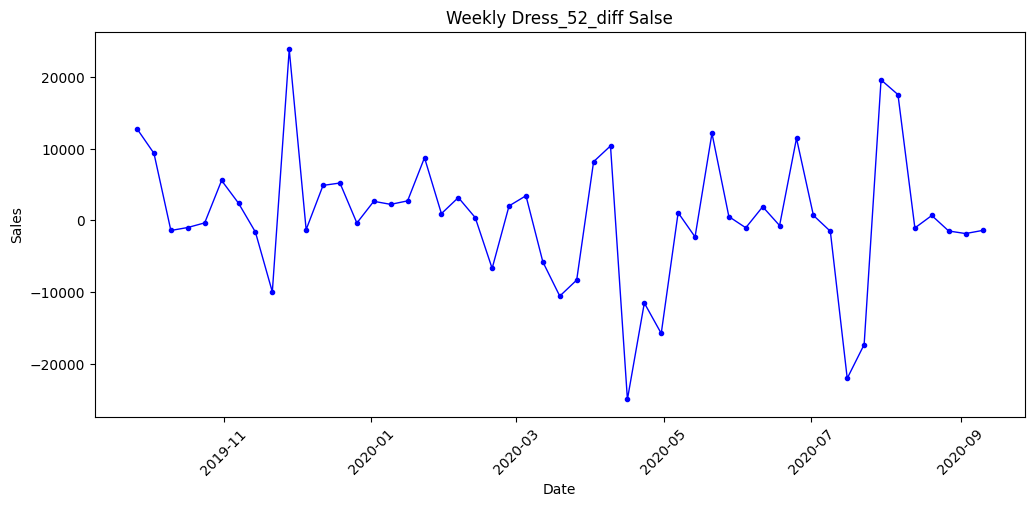

In [36]:
# plot the differed time series
plot_time_series(seasonal_52_diff, title_name="Dress_52_diff")

<div class="alert alert-block alert-success"><strong> After taking the 52 diff, the time series has no seasonality. so the differencing parameter will be 1 

> ### Autoregressive and Moving Average model parameters

> <div class="alert alert-block alert-info">
   The parameters of AR and MA models depends on the lag numbers at which the current value is affected/correlated with the previous values(errors in the case of MA)<br>

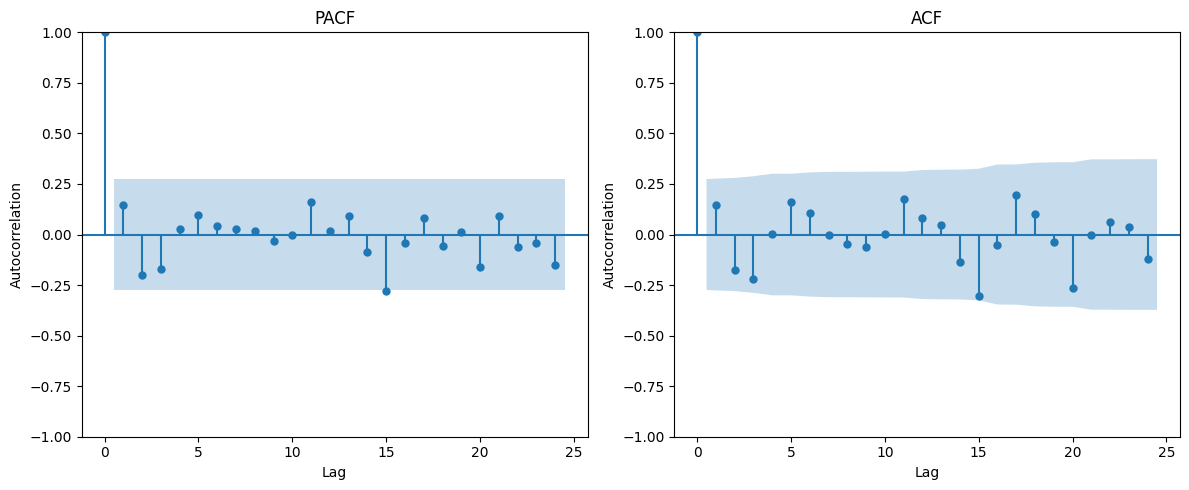

In [37]:
# get the pacf and acf plots for the 52 diff
autocorrelation_functions(seasonal_52_diff)

<div class="alert alert-block alert-success"><strong> 
    Neither PACF nor ACF show good significant lags, so the series after 52 differencing became kind of strong stationary. We won't use any AR or MA models for the seasonal ARIMA
    </strong></div>

- ### Base model

> <div class="alert alert-block alert-info">
    So far we got a starting point for our model. We will use the following parameters as our base model:<br>
        - non-seasonal ARIMA (1, 0, 5)<br>
        - seasonal ARIMA (0, 1, 0, 52)
</div>

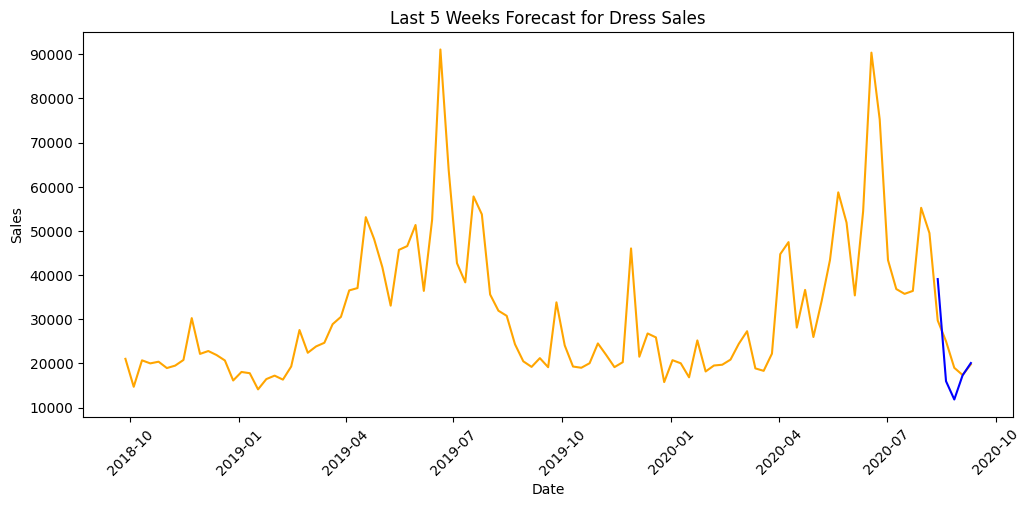

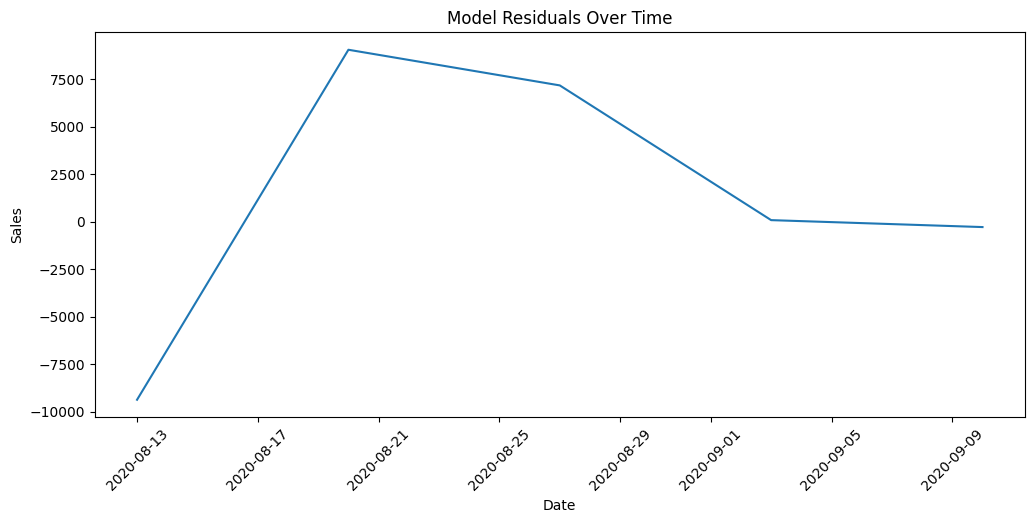



mean absolute error: 5188.2

The residuals time series is stationary in terms of trend based on KPSS test, p-value = 0.1 


In [38]:
# train arima model on the base parameters
_ = evaluate_sarima_model(data.Dress, 5, (1, 0, 5), (0, 1, 0, 52), 'Dress')

<div class="alert alert-block alert-success"><strong> 
    - The results are not that bad, the residuals are stationary with no trend and no clear seasonality. <br>
    - The model is wrong in average by 5188.2 unit of sale <br><br><br>
    But can we do better!
    </strong></div>

- ### Hyperparameter Tuning

> <div class="alert alert-block alert-info">
   Giving our base model, we will try to do hyperparameter tuning to find a better combination of parameters based on what we got as possible values in the previous steps.
</div>

In [39]:
# create different combinations using the relevant lag numbers
p_values = [1, [3], [1, 3]]
q_values = list(range(1, 6)) +\
           list([x] for x in range(1, 6))+\
           list(itertools.combinations(range(1, 6), 2))+\
           list(itertools.combinations(range(1, 6), 3))+\
           list(itertools.combinations(range(1, 6), 4))

all_combination_params = list(itertools.product(p_values, [0], q_values))

In [40]:
# run a grid search in parallel to get the best params
best_parameters = get_best_sarima_params(data.Dress, 5, all_combination_params, [(0, 1, 0, 52)])

In [41]:
best_parameters

{'best_non_seasonal_params': (1, 0, (1, 4)),
 'best_seasonal_params': (0, 1, 0, 52),
 'mean_absolute_error': 1529.8}

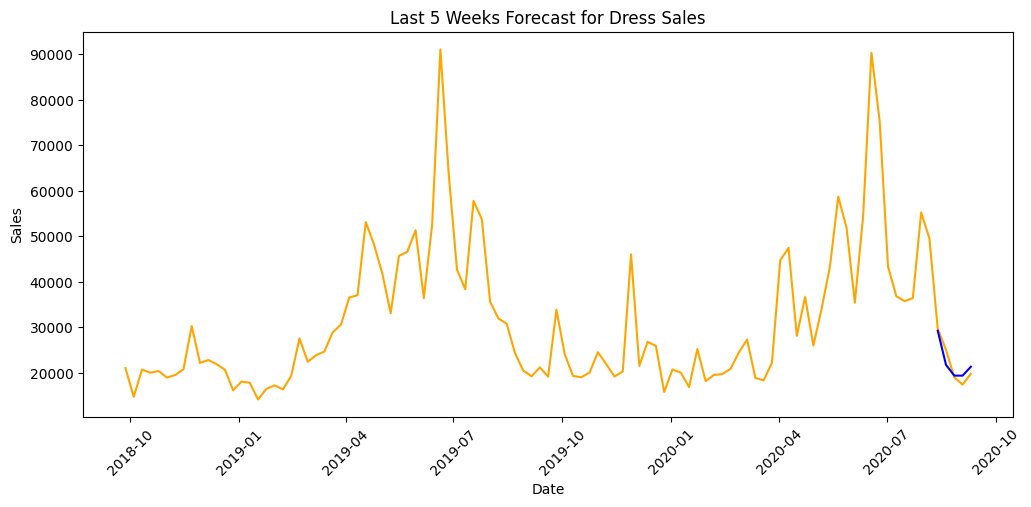

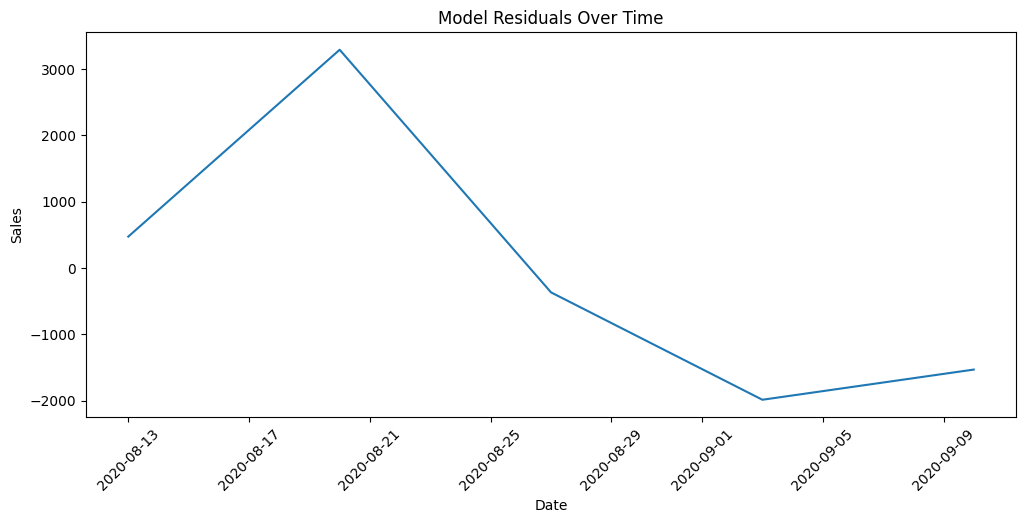



mean absolute error: 1529.8

The residuals time series is stationary in terms of trend based on KPSS test, p-value = 0.1 


In [42]:
# train a new model using the params from the tuning
_ = evaluate_sarima_model(data.Dress, 5, best_parameters['best_non_seasonal_params'],
                    best_parameters['best_seasonal_params'], title_name="Dress")

<div class="alert alert-block alert-success"><strong> 
    After doing the hyperparameters tuning we got a better model with these params:<br>
     - best non seasonal params: (1, 0, (1, 4)) <br><br>
     with a mean_absolute_error of 1529.8 which is better than our base model that has 5188.2 mean_absolute_error.   As a conclusion, our best model is wrong in average by 1529.8 unit of sales.
    </strong></div>

- ### Forecasting for Next 5 Weeks

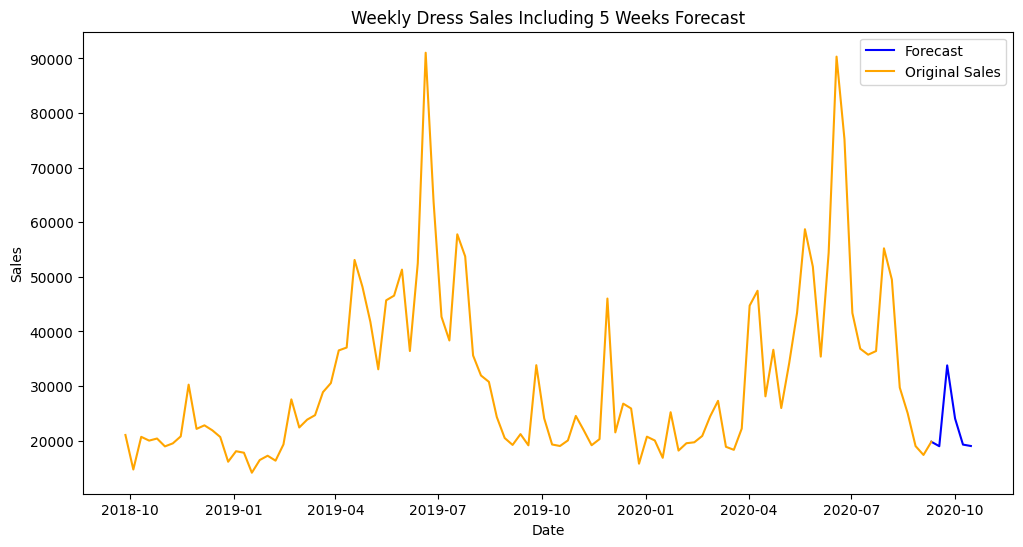

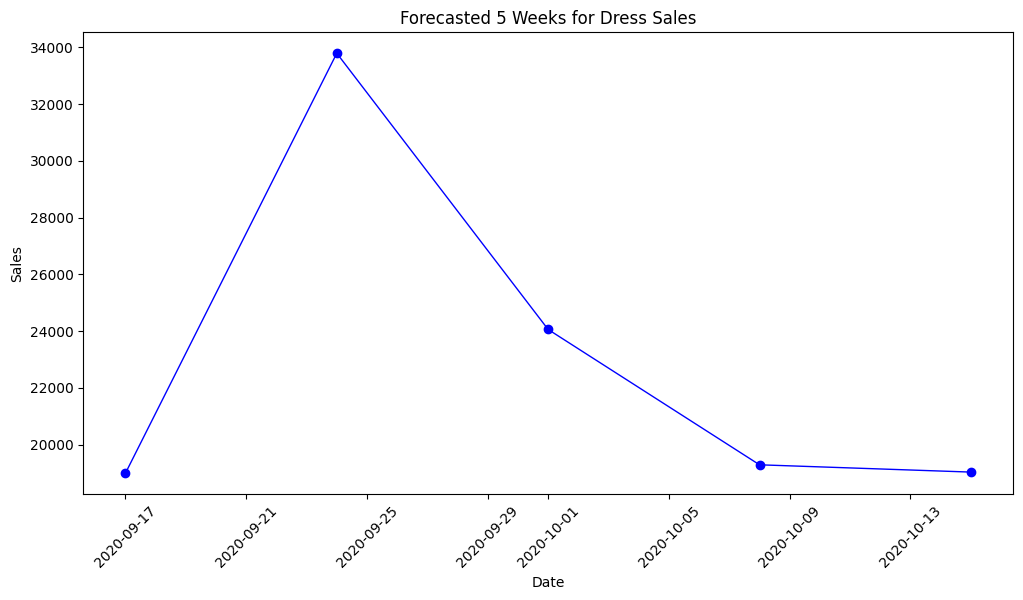

In [43]:
# using our the params we got to forcast the Dress sales for the next 5 weeks
forecasts = forecast_sarima_model(data.Dress, 5,
                      best_parameters['best_non_seasonal_params'],
                      best_parameters['best_seasonal_params'],
                      title_name='Dress')

In [44]:
forecasts

2020-09-17    18987.0
2020-09-24    33791.0
2020-10-01    24055.0
2020-10-08    19285.0
2020-10-15    19028.0
Freq: W-THU, Name: predicted_mean, dtype: float64

<div class="alert alert-block alert-success"><strong> 
    The forecast starts in 2020-09-17 with 18987 sales then spike to 2020-09-24 with more than 30000 sales and then drop from that peak and continue decreasing. 
    </strong></div>